In [1]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, precision_recall_curve, accuracy_score, zero_one_loss, balanced_accuracy_score, average_precision_score
from inspect import signature
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
import os
import pickle
import sys
import logging
import seaborn as sns
from tensorflow.keras import backend
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from osgeo import gdal

In [3]:
model1 = load_model("/opt/datos/entrenamientos/larraondo/vgg16_val_0_2_6.h5")
model2 = load_model("/opt/datos/entrenamientos/larraondo/unet_val_0-2-6.h5")
x_test = np.load("/opt/datos/dataset/larraondo/x_test-0_2_6_validation.npy")
y_test = np.load("/opt/datos/dataset/larraondo/y_test-0_2_6_validation.npy")

In [4]:
y_pred1 = model1.predict(x_test) #vgg16

In [5]:
y_pred2 = model2.predict(x_test) #Unet

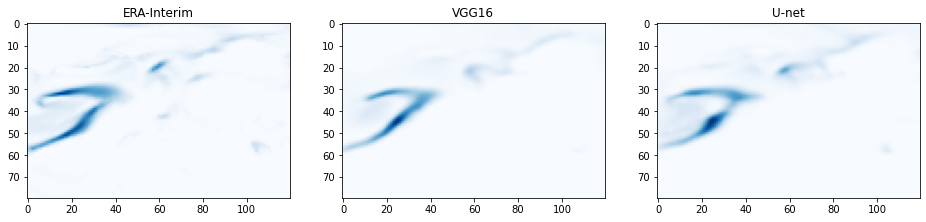

In [54]:
muestra = 2350
img = [y_test[muestra,:,:,0], y_pred1[muestra,:,:,0], y_pred2[muestra,:,:,0]]
rows=1
columns=3
titulos = ['ERA-Interim','VGG16','U-net']
fig=plt.figure(figsize=(16,16))
for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(img[i-1], cmap='Blues')
    plt.title(titulos[i-1])
plt.show()

In [2]:
model3 = load_model('/opt/datos/entrenamientos/larraondo/vgg16_0_3_5.h5')
x_test = np.load("/opt/datos/dataset/sin_normalizar/X.npy")
y_test = np.load("/opt/datos/dataset/milimetros/Y.npy")

In [3]:
x_test = np.moveaxis(x_test, 1, 3)
x_test = x_test[:,20:100,20:140,:]
y_test = y_test[:,20:100,20:140]

print(x_test.shape)
print(y_test.shape)

(11928, 80, 120, 3)
(11928, 80, 120)


In [4]:
x_test_98 = x_test*9.8

In [5]:
y_pred3 = model3.predict(x_test_98) #vgg16

Maximo en WRF: 16.586178273893893 - Maximo en VGG16: 0.32342812418937683


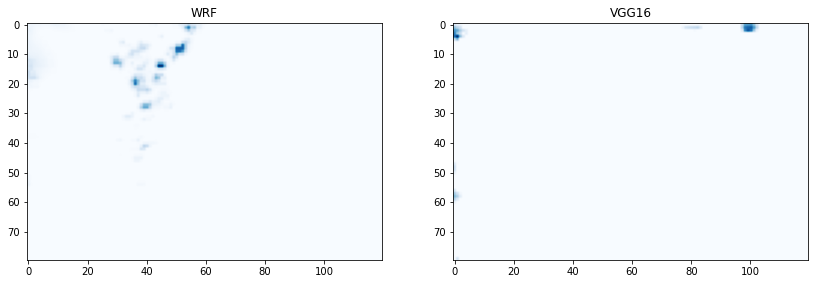

In [63]:
muestra = 7529
img = [y_test[muestra,:,:], y_pred3[muestra,:,:,0]]
rows=1
columns=2
titulos = ['WRF','VGG16']
fig=plt.figure(figsize=(14,14))
for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(img[i-1], cmap='Blues')
    plt.title(titulos[i-1])
print(f"Maximo en WRF: {y_test[muestra,:,:].max()} - Maximo en VGG16: {y_pred3[muestra,:,:,0].max()}")
plt.show()


In [14]:
modelo = load_model('/opt/datos/entrenamientos/larraondo/vgg16_0_3_5.h5')

In [51]:
grib = gdal.Open('/opt/wrfdatos/GFS025/2020_01/05_18/GFS_2020010518+009.grib2')

In [1]:
import rasterstats

In [ ]:
banda = grib.

In [52]:
band500 = grib.GetRasterBand(99)
band700 = grib.GetRasterBand(119)
band1000 = grib.GetRasterBand(163)

data500 = band500.ReadAsArray()
data700 = band700.ReadAsArray()
data1000 = band1000.ReadAsArray()

data500.shape

(261, 325)

In [53]:
band500 = grib.GetRasterBand(99)
band700 = grib.GetRasterBand(119)
band1000 = grib.GetRasterBand(163)

data500 = band500.ReadAsArray()
data700 = band700.ReadAsArray()
data1000 = band1000.ReadAsArray()

data500 = data500[60:140, 60:180]
data700 = data700[60:140, 60:180]
data1000 = data1000[60:140, 60:180]

muestra = np.zeros((1, 80, 120, 3))
muestra[0,:,:,0] = data1000
muestra[0,:,:,1] = data700
muestra[0,:,:,2] = data500

muestra_98 = muestra*9.81
print(muestra.shape)

(1, 80, 120, 3)


In [54]:
y_pred = modelo.predict(muestra_98)
y_pred.shape

(1, 80, 120, 1)

Maximo en mm: 4.342285633087158


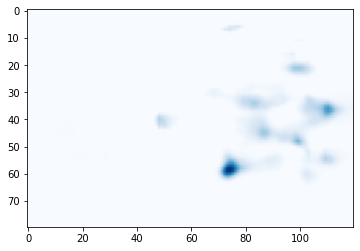

In [55]:
print(f"Maximo en mm: {y_pred[0,:,:,0].max()}")
plt.imshow(y_pred[0,:,:,0], cmap = 'Blues')

In [ ]:
##################### Modelo de Unet entrenado con muestras 176x176 multiplicadas por 9.8

In [2]:
model = load_model('/opt/datos/entrenamientos/unet98_mm_No_normalized.h5')
x_test = np.load("/opt/datos/dataset/sin_normalizar/X_test.npy")
y_test = np.load("/opt/datos/dataset/milimetros/Y_test.npy")

print(x_test.shape)
print(y_test.shape)

(1789, 3, 176, 176)
(1789, 176, 176)


In [3]:
x_test_98 = x_test*9.8

In [12]:
y_pred = model.predict(x_test)
print(y_pred.shape)

(1789, 1, 176, 176)


Maximo en WRF: 39.02226257324219 - Maximo en Unet: 1.7291616201400757


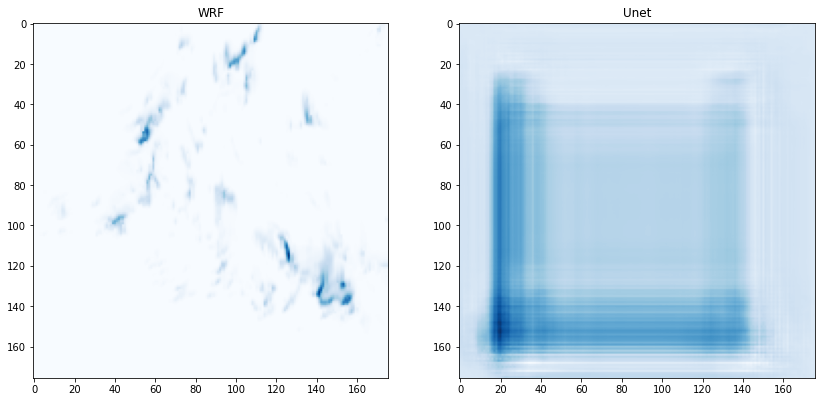

In [18]:
muestra = 527
img = [y_test[muestra,:,:], y_pred[muestra,0,:,:]]
rows=1
columns=2
titulos = ['WRF','Unet']
fig=plt.figure(figsize=(14,14))
for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(img[i-1], cmap='Blues')
    plt.title(titulos[i-1])
print(f"Maximo en WRF: {y_test[muestra,:,:].max()} - Maximo en Unet: {y_pred[muestra,:,:,0].max()}")
plt.show()

In [14]:
y_pred.max()

18.685114